# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
df_data.shape

(4324, 9)

In [8]:
rows = df_data.shape[0]
rows

4324

In [9]:
columns = df_data.columns
len(columns)

9

In [10]:
column_names = df_data.columns
for name in column_names:
    print(name)

Unnamed: 0.1
Unnamed: 0
Organisation
Location
Date
Detail
Rocket_Status
Price
Mission_Status


In [11]:
df_data.isna().value_counts()

Unnamed: 0.1  Unnamed: 0  Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False       False         False     False  False   False          True   False             3360
                                                                                False  False              964
Name: count, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [12]:
df_data = df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [13]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [14]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [15]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [16]:
data_launchers = df_data[['Organisation', 'Mission_Status']]

In [17]:
data_launchers

,Organisation,Mission_Status
0,SpaceX,Success
1,CASC,Success
2,SpaceX,Success
3,Roscosmos,Success
4,ULA,Success
...,...,...
4319,US Navy,Failure
4320,AMBA,Success
4321,US Navy,Failure
4322,RVSN USSR,Success


In [18]:
d = {'Success' : 1, 'Failure' : 0}
data_launchers['Mission_Status'] = data_launchers['Mission_Status'].map(d)

C:\Users\PT WORLD\AppData\Local\Temp\ipykernel_16332\255250022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_launchers['Mission_Status'] = data_launchers['Mission_Status'].map(d)


In [19]:
data_launchers['Mission_Status']

0      1.00
1      1.00
2      1.00
3      1.00
4      1.00
       ... 
4319   0.00
4320   1.00
4321   0.00
4322   1.00
4323   1.00
Name: Mission_Status, Length: 4324, dtype: float64

In [20]:
data_launchers['Organisation'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [21]:
chart_launchers = data_launchers.groupby('Organisation').count()

In [22]:
chart_launchers

,Mission_Status
Organisation,
AEB,2
AMBA,7
ASI,9
Arianespace,276
Arm??e de l'Air,3
Blue Origin,12
Boeing,134
CASC,245
CASIC,5


In [23]:
chart_launchers = chart_launchers.reset_index()

In [24]:
chart_launchers

,Organisation,Mission_Status
0,AEB,2
1,AMBA,7
2,ASI,9
3,Arianespace,276
4,Arm??e de l'Air,3
5,Blue Origin,12
6,Boeing,134
7,CASC,245
8,CASIC,5
9,CECLES,4


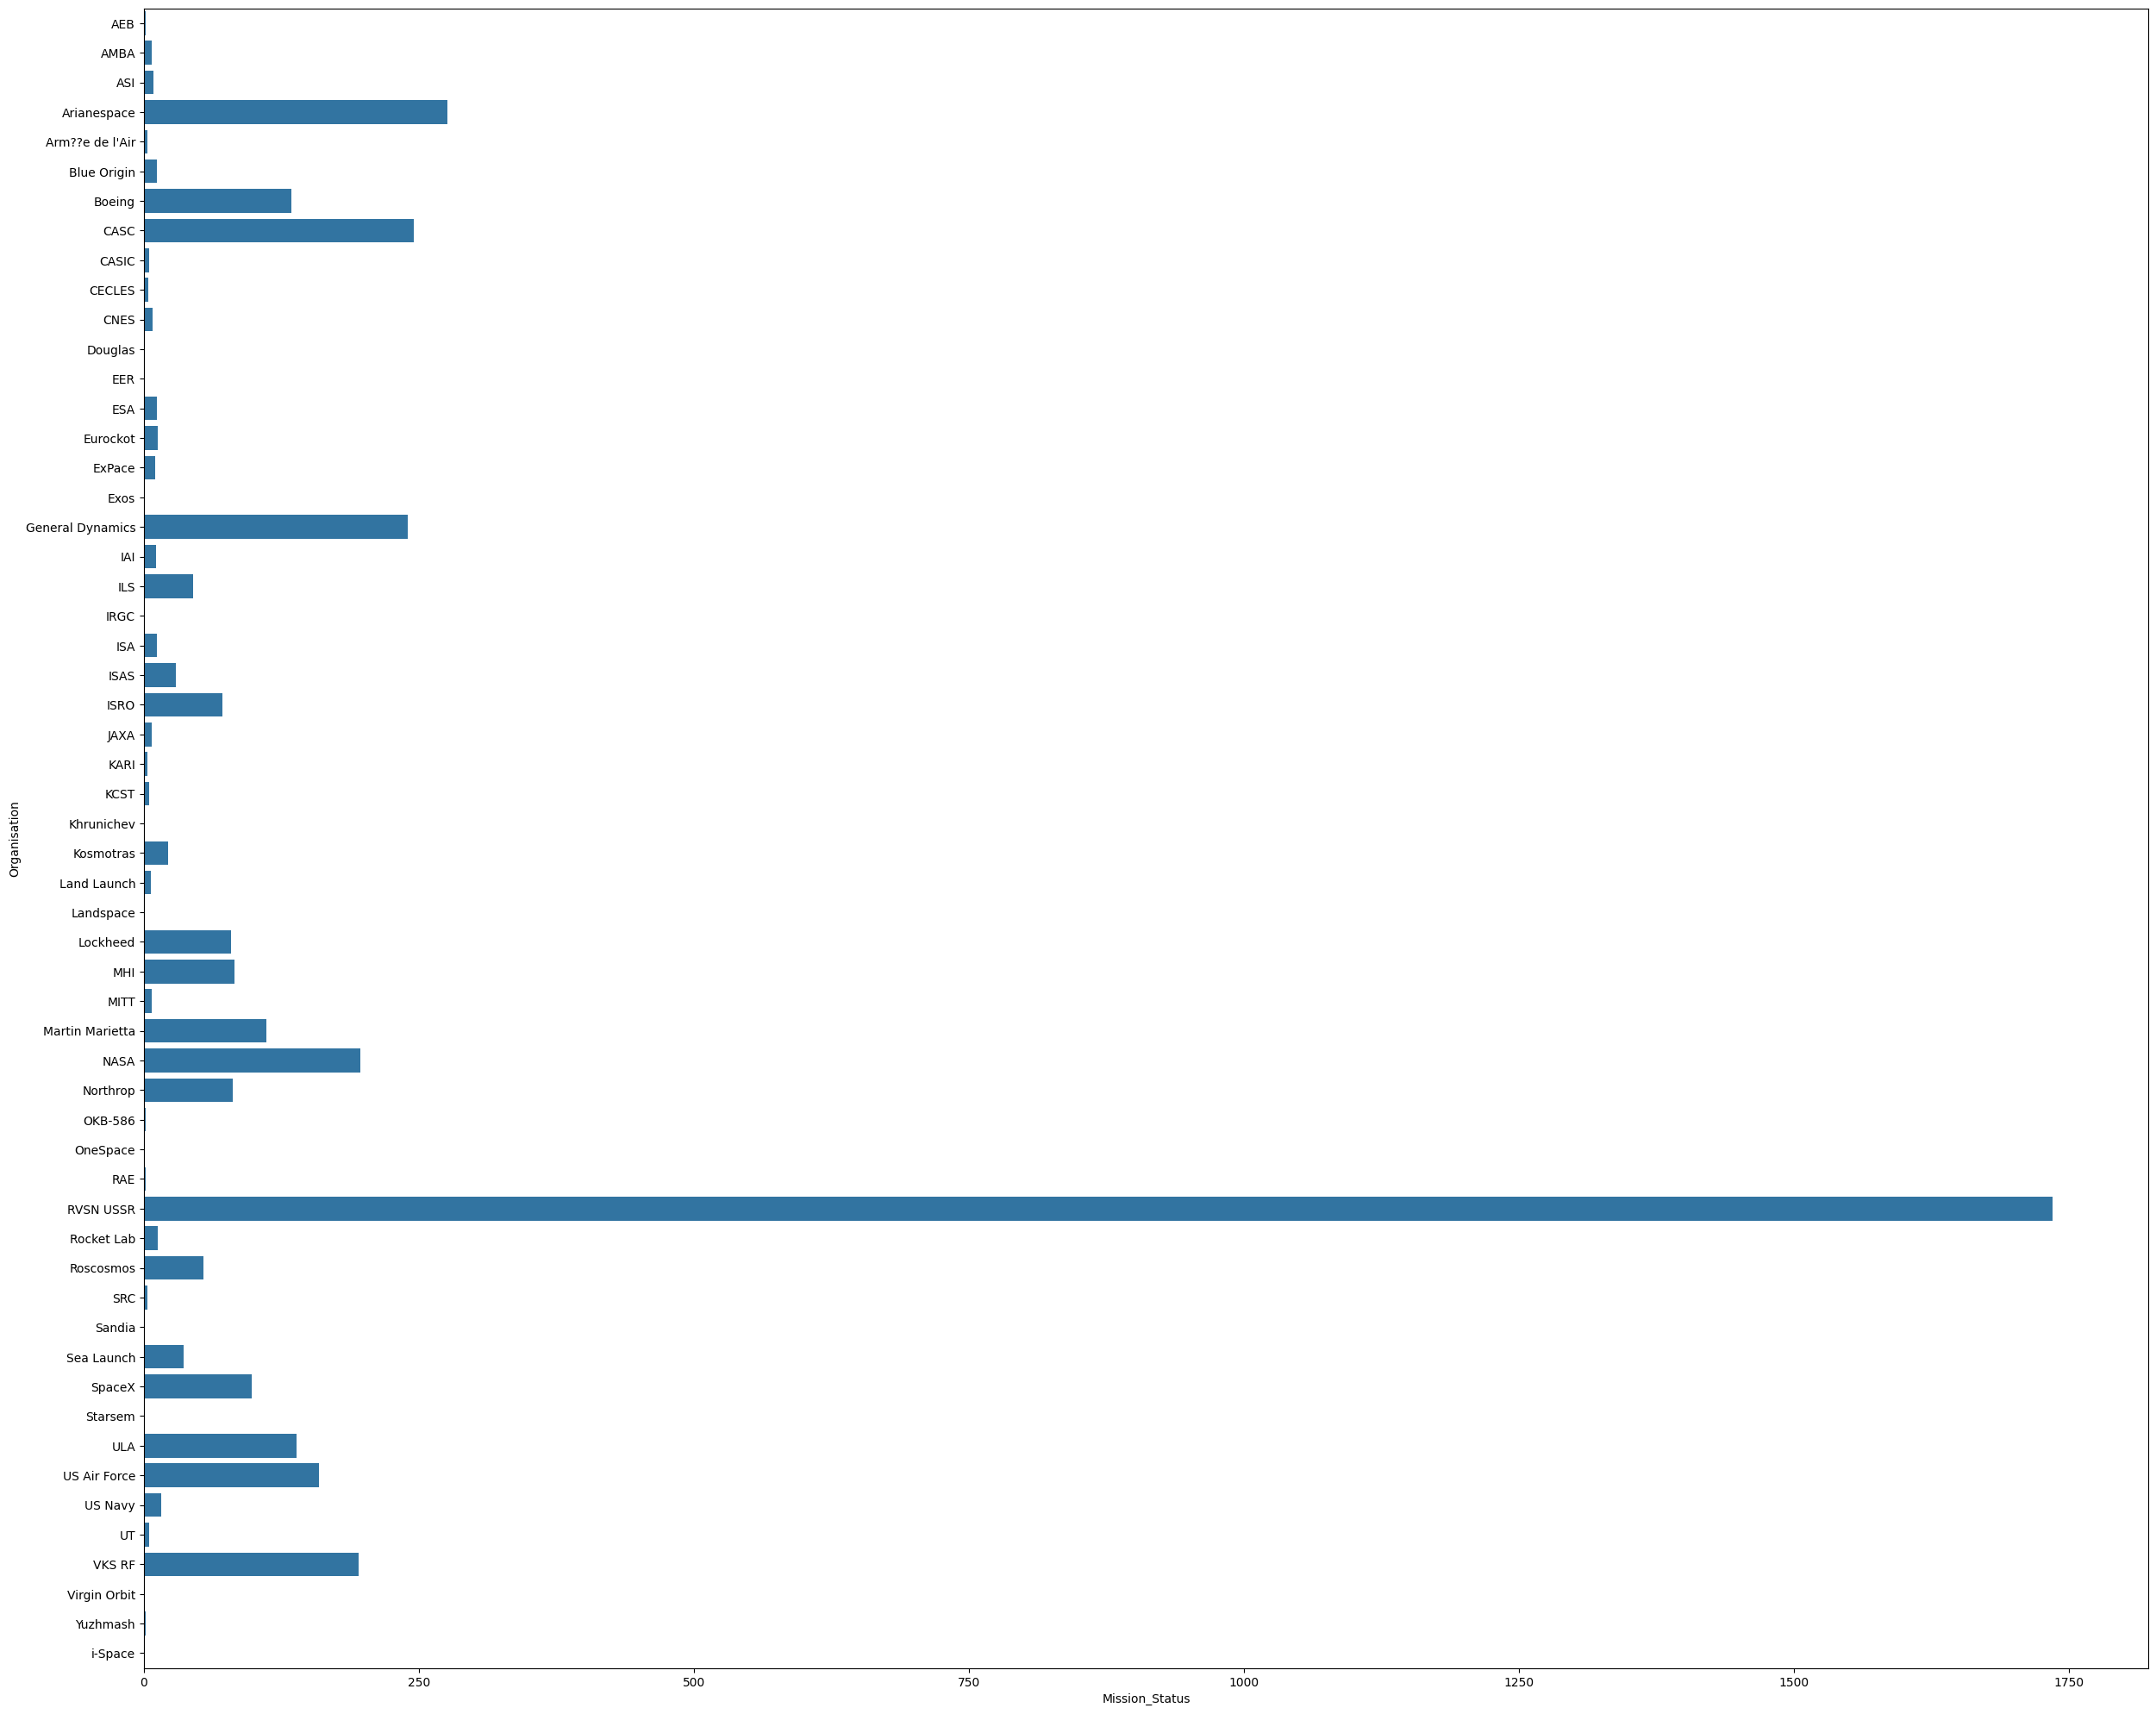

In [25]:
y = chart_launchers['Organisation']
x = chart_launchers['Mission_Status']


plt.figure(figsize=(30, 25))
sns.barplot(data=chart_launchers, x=x, y=y)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [26]:
Active_Rockets = len(df_data[df_data['Rocket_Status'] == "StatusActive"])
Active_Rockets

790

In [27]:
Inactive_Rockets = len(df_data[df_data['Rocket_Status'] == 'StatusRetired'])
Inactive_Rockets

3534

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [28]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [29]:
Successful_Missions = len(df_data[df_data['Mission_Status'] == 'Success'])
Successful_Missions

3879

In [30]:
Unsuccessful_Missions = len(df_data[df_data['Mission_Status'] == 'Failure'])
Unsuccessful_Missions

339

In [31]:
len(df_data['Mission_Status'])

4324

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [32]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [33]:
len(df_data[df_data['Price'].isna()])

3360

In [34]:
df_data['Price'] = df_data['Price'].fillna(0)

In [35]:
def convert_to_float(item):
    if isinstance(item, str):
        item = item.replace(',', '')
    try:
        return float(item)
    except ValueError:
        print(f"Cannot convert {item} to float")
        return None

In [36]:
df_data['Price'] = df_data['Price'].apply(convert_to_float)

In [37]:
exp_launchers = df_data[['Organisation', 'Price']]
exp_launchers

,Organisation,Price
0,SpaceX,50.00
1,CASC,29.75
2,SpaceX,0.00
3,Roscosmos,65.00
4,ULA,145.00
...,...,...
4319,US Navy,0.00
4320,AMBA,0.00
4321,US Navy,0.00
4322,RVSN USSR,0.00


In [38]:
exp_launchers['Price'] >= 0

0       True
1       True
2       True
3       True
4       True
        ... 
4319    True
4320    True
4321    True
4322    True
4323    True
Name: Price, Length: 4324, dtype: bool

In [39]:
exp_launchers = exp_launchers.groupby('Organisation').sum()
exp_launchers = exp_launchers.reset_index()


In [40]:
df = exp_launchers[exp_launchers['Price'] > 0.00]

In [41]:
df  

,Organisation,Price
3,Arianespace,"16,345.00"
6,Boeing,"1,241.00"
7,CASC,"6,340.26"
12,EER,20.00
13,ESA,37.00
14,Eurockot,543.40
15,ExPace,28.30
19,ILS,"1,320.00"
23,ISRO,"2,177.00"
24,JAXA,168.00


In [42]:
y = df['Price']
x = df['Organisation']

px.histogram(data_frame=df, y='Price', x='Organisation')

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [43]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [44]:
df_without_price = df_data.drop('Price', axis=1)

In [75]:
renamed_df = df_without_price
renamed_df.Location = renamed_df.Location.str.replace("USA","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Gran Canaria","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Russia","RUSSIAN FEDERATION")
renamed_df.Location = renamed_df.Location.str.replace("Barents Sea","RUSSIAN FEDERATION")
renamed_df.Location = renamed_df.Location.str.replace("New Mexico","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Yellow Sea","CHINA")
renamed_df.Location = renamed_df.Location.str.replace("Shahrud Missile Test Site","Iran")
renamed_df.Location = renamed_df.Location.str.replace("Pacific Ocean","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Pacific Missile Range Facility","UNITED STATES OF AMERICA")
 

df_country = renamed_df["Location"].str.split(",", expand=True).reset_index()
df_country[3] = df_country[3].str.lstrip(" ")
 

col_1 = df_country[1]
col_2 = df_country[2]
col_3 = df_country[3]
new_df = []
for one, two, three in zip(col_1, col_2, col_3):
    if three is None:
        three = two
    if three is None:
        three = one
    new_df.append(three)
 
import iso3166
country_iso = []
for country in new_df:
    country = country.lstrip(" ")
    if country == "Iran":
        country = "IRAN, ISLAMIC REPUBLIC OF"
    if country == "North Korea":
        country = "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF"
    if country == "South Korea":
        country = "KOREA, REPUBLIC OF"
    try:
        country_iso.append(iso3166.countries_by_name[country.upper()][2])
    except KeyError:
        print (country)
 
df_without_price["Country_ISO"] = pd.DataFrame(country_iso)
 
choro_df_launches = df_without_price.groupby(["Country_ISO"], as_index=False).agg({"Detail":pd.Series.count})
choro_df_launches.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
choro_df_launches.sort_values("Launch_Counts", ascending=False)
 
fig = px.choropleth(choro_df_launches, locations="Country_ISO", color="Launch_Counts", color_continuous_scale="sunsetdark")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [46]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [50]:
def get_country(data):
    data = data.split(',')[-1]
    return data

In [53]:
df_data['Country'] = df_data['Location'].apply(get_country)

In [78]:


fig = px.sunburst(df_data,
                  path=['Country', 'Organisation', 'Mission_Status'],
                  hover_data=['Country'],
                  color_continuous_scale='viridis',
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [73]:
money_spent = df_data.dropna().groupby('Organisation')['Price'].sum().sort_values(ascending=False)

money_spent

Organisation
NASA               76,280.00
Arianespace        16,345.00
ULA                14,798.00
RVSN USSR          10,000.00
CASC                6,340.26
SpaceX              5,444.00
Northrop            3,930.00
MHI                 3,532.50
ISRO                2,177.00
US Air Force        1,550.92
VKS RF              1,548.90
ILS                 1,320.00
Boeing              1,241.00
Roscosmos           1,187.50
Martin Marietta       721.40
Kosmotras             638.00
Eurockot              543.40
Lockheed              280.00
JAXA                  168.00
Rocket Lab             97.50
ESA                    37.00
ExPace                 28.30
EER                    20.00
Sandia                 15.00
Virgin Orbit           12.00
ISAS                    0.00
IRGC                    0.00
ISA                     0.00
Exos                    0.00
General Dynamics        0.00
CECLES                  0.00
IAI                     0.00
CNES                    0.00
Douglas                 0.00
B

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
money_spent_by_organization_per_launch = pd.concat([money_spent, choro_df_launches], axis=1).reset_index()
money_spent_by_organization_per_launch.columns = ['Organisation', 'Money Spent', 'Launch Count']
money_spent_by_organization_per_launch['Money per Launch'] = money_spent_by_organization_per_launch['Money Spent'] / money_spent_by_organization_per_launch['Launch Count']
money_spent_by_organization_per_launch = money_spent_by_organization_per_launch.sort_values('Money per Launch', ascending=False).dropna()

# Chart the Number of Launches per Year

In [94]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True).dt.tz_localize(None)

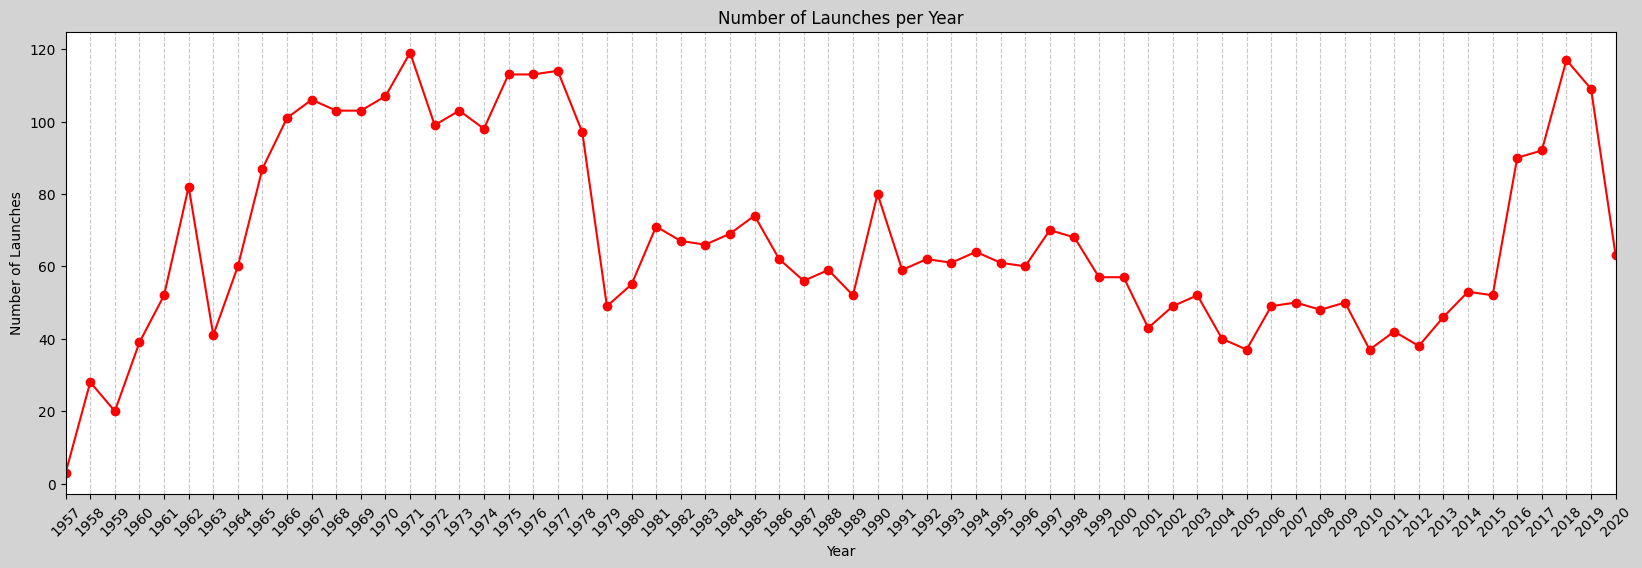

In [96]:
launches_per_year = df_data.groupby(df_data['Date'].dt.year).size()
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(launches_per_year, marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(launches_per_year.index, rotation=45)
plt.margins(x=0)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

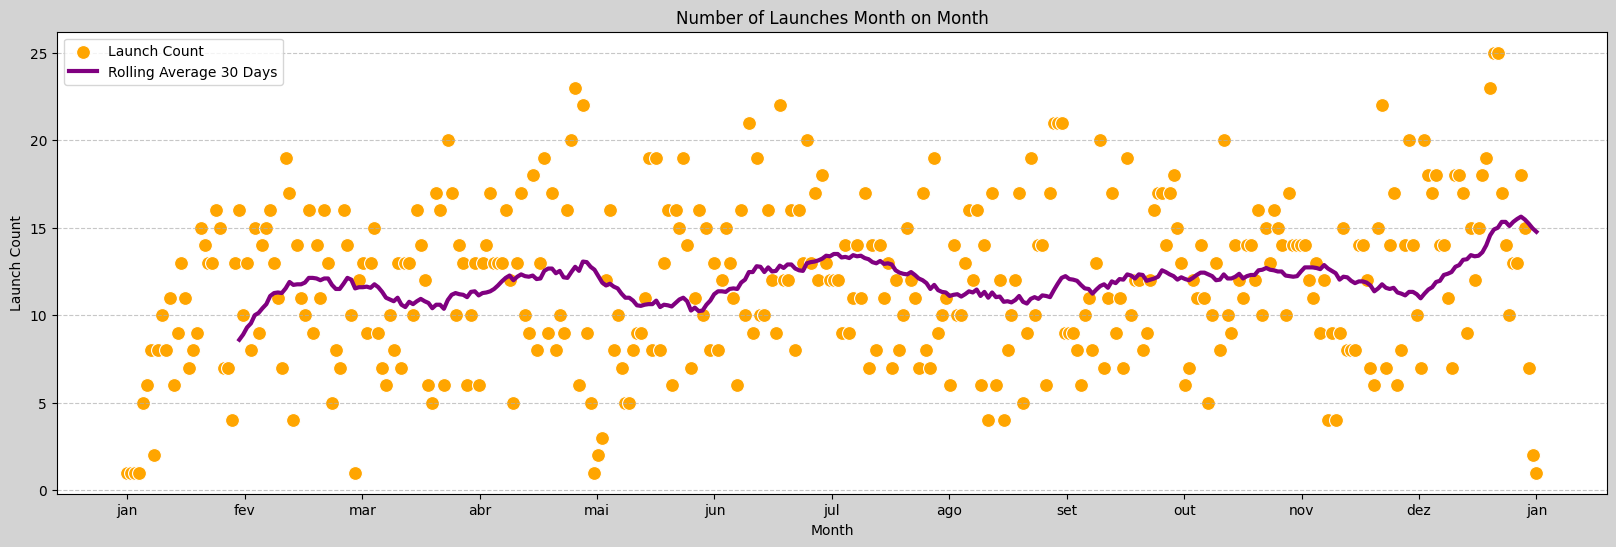

In [97]:
launches_month_on_month = df_data.groupby('Date').size().reset_index(name='Launch Count')
launches_month_on_month = launches_month_on_month.groupby([launches_month_on_month['Date'].dt.month.rename('Month'), launches_month_on_month['Date'].dt.day.rename('Day')])['Launch Count'].sum().reset_index(name='Launch Count')
launches_month_on_month['Rolling Average'] = launches_month_on_month['Launch Count'].rolling(30).mean()
launches_month_on_month['Year'] = '2020'
launches_month_on_month['Date'] = pd.to_datetime(launches_month_on_month[['Year', 'Month', 'Day']])
min_date = launches_month_on_month['Date'].min()
max_date = launches_month_on_month['Date'].max()
total_days = (max_date - min_date).days
monthly_intervals = [min_date + timedelta(days=total_days/12 * i) for i in range(13)]
month_labels = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'jan']
plt.figure(figsize=(20, 6), facecolor='lightgray')
ax = sns.scatterplot(
      x = 'Date',
			y = 'Launch Count',
			data = launches_month_on_month,
      label = 'Launch Count',
      color = 'orange',
      marker = 'o',
      s = 100
)
sns.lineplot(
      x = 'Date',
			y = 'Rolling Average',
			data = launches_month_on_month,
      label = 'Rolling Average 30 Days',
      color = 'purple',
      linewidth = 3,
)
plt.xlabel('Month')
plt.ylabel('Launch Count')
plt.title('Number of Launches Month on Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=monthly_intervals, labels=month_labels)
plt.legend(loc='upper left')

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [98]:
launches_month_on_month.groupby('Month')['Launch Count'].sum()

Month
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Launch Count, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

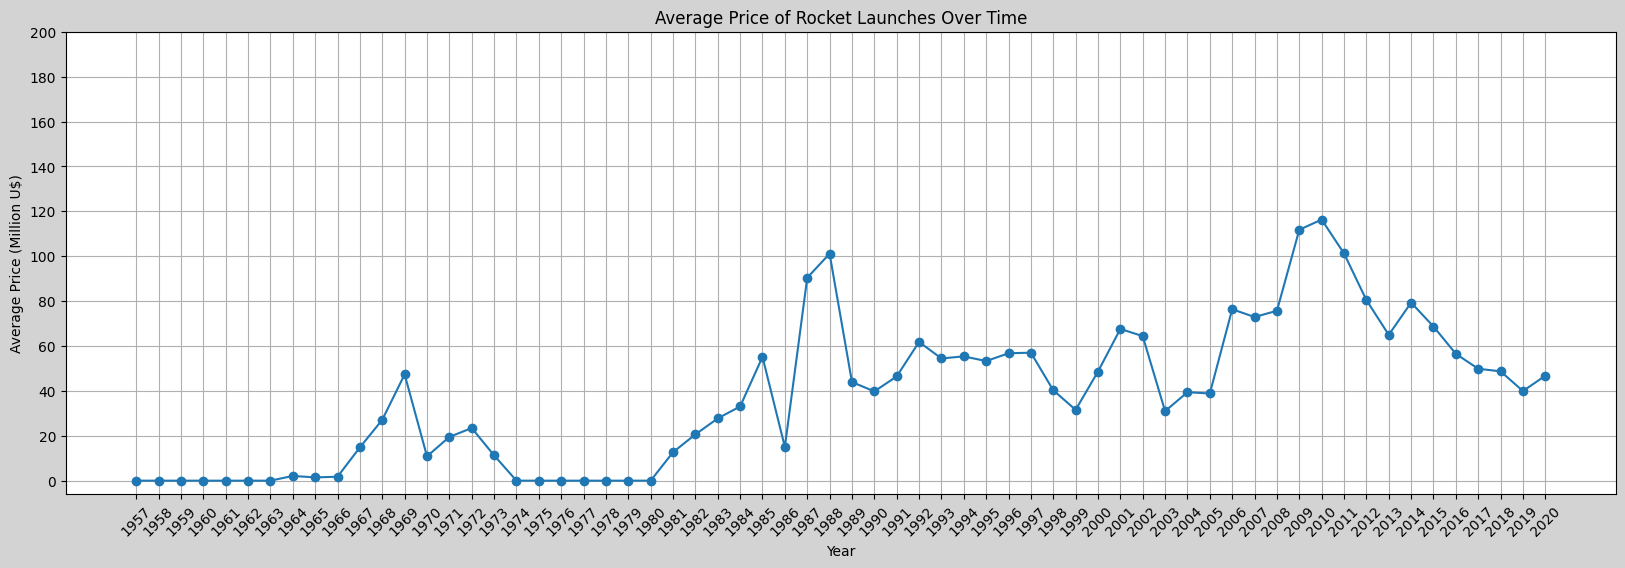

In [99]:
average_launch_price = df_data.groupby(df_data['Date'].dt.year)['Price'].mean()
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(average_launch_price.index, average_launch_price.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Price (Million U$)')
plt.title('Average Price of Rocket Launches Over Time')
plt.grid(True)
plt.xticks(average_launch_price.index, rotation=45)
plt.yticks(range(0, 201, 20))
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [101]:
launches_top10_organizations = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Organisation']).size().reset_index(name='Launch Count')
top10_organizations = launches_top10_organizations.groupby('Organisation')['Launch Count'].sum().sort_values(ascending=False).head(10).reset_index()
launches_top10_organizations = launches_top10_organizations.merge(top10_organizations['Organisation'], on='Organisation', how='inner')
fig = px.bar(launches_top10_organizations, x="Year", y="Launch Count", color="Organisation")
fig.update_layout(title="Number of Launches over Time by Top 10 Organisations")
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [102]:
cold_war_update = {
    'Russian Federation': 'USSR',
    'Kazakhstan': 'USSR'
}
df_data.loc[(df_data['Date'].dt.year <= 1991), 'Country'] = df_data['Country'].replace(cold_war_update)
cold_war = df_data[df_data['Date'].dt.year <= 1991]
cold_war_launches = cold_war.groupby([cold_war['Date'].dt.year.rename('Year'), 'Country']).size().reset_index(name='Launch Count')

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [103]:
cold_war_launches_USA_USSR = cold_war_launches.loc[cold_war_launches['Country'].isin(['USA', 'USSR'])]
fig = px.pie(cold_war_launches_USA_USSR, values="Launch Count", names="Country", title='Cold War Space Race Total Rocket Launches')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [104]:
fig = px.bar(cold_war_launches_USA_USSR, x="Year", y="Launch Count", color='Country', barmode='group', title='Total Number of Launches Year-On-Year')
fig.update_xaxes(dtick=1)
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

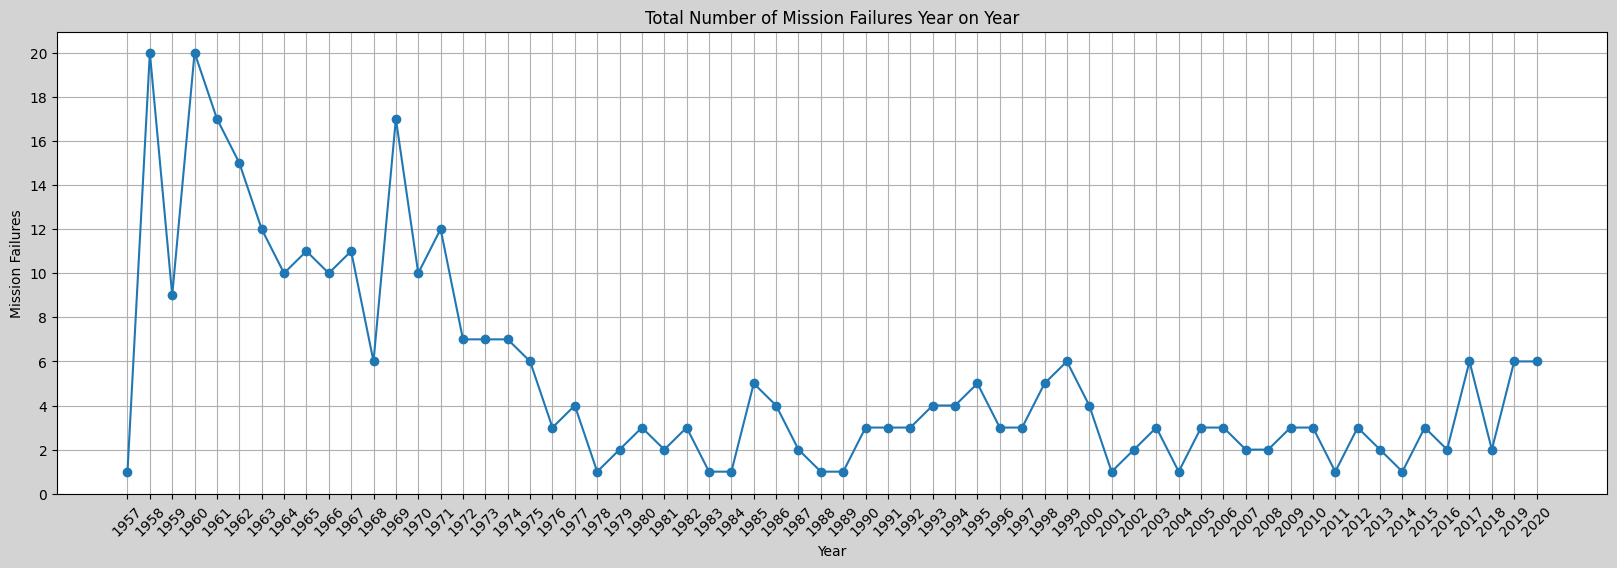

In [106]:
mission_status_year_on_year = df_data.groupby(df_data['Date'].dt.year.rename('Year'))['Mission_Status'].value_counts().reset_index(name='Total')
mission_failures_year_on_year = mission_status_year_on_year[mission_status_year_on_year['Mission_Status'] == 'Failure']
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(mission_failures_year_on_year['Year'], mission_failures_year_on_year['Total'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mission Failures')
plt.title('Total Number of Mission Failures Year on Year')
plt.xticks(mission_failures_year_on_year['Year'], rotation=45)
plt.yticks(range(0, 21, 2))
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

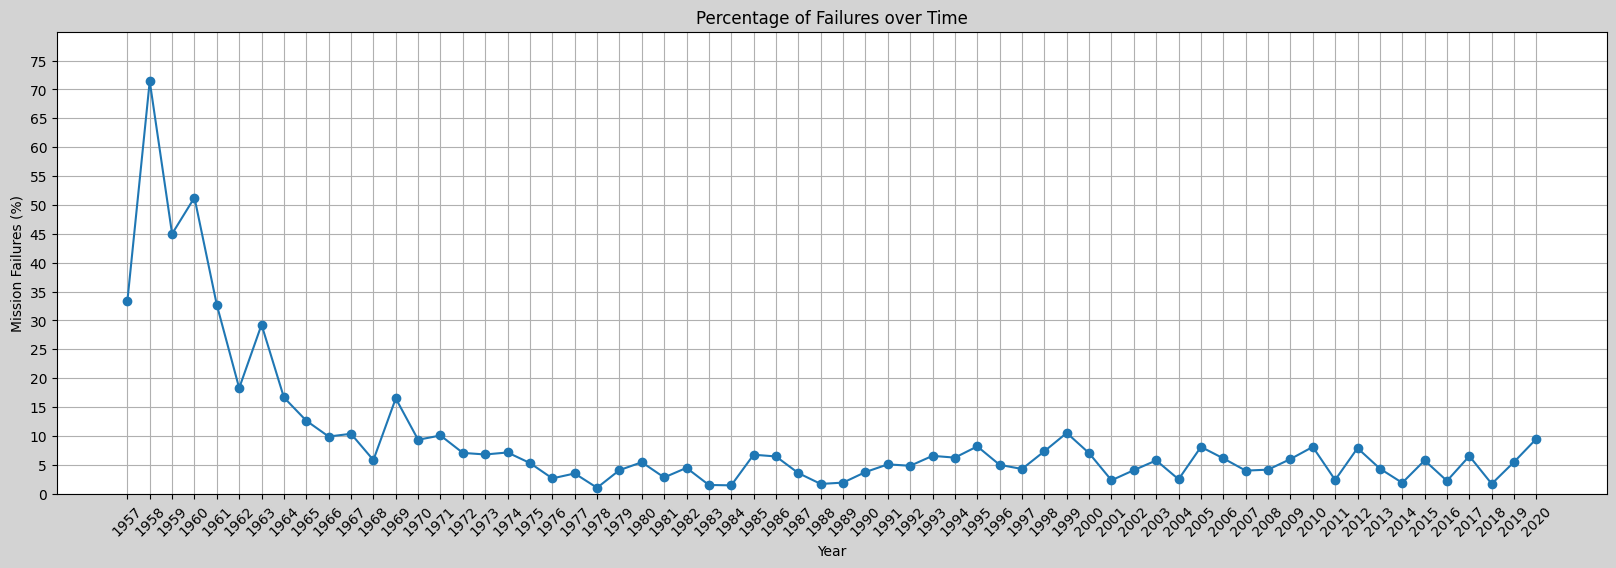

In [107]:
total_mission_status_year_on_year = mission_status_year_on_year.groupby(['Year'])['Total'].sum().reset_index(name='Total Missions')
mission_failures_year_on_year_percentage = mission_failures_year_on_year.merge(total_mission_status_year_on_year, on='Year')
mission_failures_year_on_year_percentage['Percentage'] = (mission_failures_year_on_year_percentage['Total'] / mission_failures_year_on_year_percentage['Total Missions']) * 100
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(mission_failures_year_on_year_percentage['Year'], mission_failures_year_on_year_percentage['Percentage'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mission Failures (%)')
plt.title('Percentage of Failures over Time')
plt.xticks(mission_failures_year_on_year_percentage['Year'], rotation=45)
plt.ylim(0, 80)
plt.yticks(range(0, 80, 5))
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [108]:
top_country_per_year = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Country', 'Mission_Status']).size().reset_index(name='Launch Count')
top_country_launches_per_year = top_country_per_year.groupby(['Year', 'Country'])['Launch Count'].sum().reset_index(name='Launch Count')
top_country_launches_per_year = top_country_launches_per_year.loc[top_country_launches_per_year.groupby('Year')['Launch Count'].idxmax()]

fig = px.bar(top_country_launches_per_year, x="Year", y="Launch Count", color='Country', title='Lead Country in Total Launches')
fig.update_xaxes(dtick=1)
fig.show()
top_country_successful_launches_per_year = top_country_per_year[top_country_per_year['Mission_Status'] == 'Success']
top_country_successful_launches_per_year = top_country_successful_launches_per_year.loc[top_country_successful_launches_per_year.groupby('Year')['Launch Count'].idxmax()]

fig = px.bar(top_country_successful_launches_per_year, x="Year", y="Launch Count", color='Country', title='Lead Country in Successful Launches')
fig.update_xaxes(dtick=1)
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [111]:
organization_lead_launch = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Organisation']).size().reset_index(name='Launch Count')
organization_lead_launch = organization_lead_launch.loc[organization_lead_launch.groupby('Year')['Launch Count'].idxmax()]

fig = px.bar(organization_lead_launch, x="Year", y="Launch Count", color='Organisation', title='Lead Organization in Total Launches')
fig.update_xaxes(dtick=1)
fig.show()